In [1]:
import snscrape
import snscrape.modules.twitter as sn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def politico(nome) : 
    #Definizione ricerca
    dizionario = ['"Changement climatique"' , '"Émissions"' , '"Réchauffement climatique"' ,
    '"Urgence climatique"' ,'"Accords de Paris"' , '"Gaz à effet de serre"' ,'"Accords de Paris"', '"Renouvelables"' , 
    '"Grève climatique"' , '"Gouvernement climatique"']
    claim = nome  + dizionario[0]
    for i in dizionario :
        claim = claim  + ' OR ' + i 
    claim = claim  + ' until:2022-6-19 since:2021-6-19'
    print(claim)

    #ricerca e conto
    scrape = sn.TwitterSearchScraper(claim)
    counter = 0
    for i in scrape.get_items() :
        counter = counter +1
        
    #conto totale    
    claim = nome + ' until:2022-6-19 since:2021-6-19'
    scrape = sn.TwitterSearchScraper(claim)
    counter_tot = 0
    for i in scrape.get_items() :
        counter_tot = counter_tot +1

    if(counter_tot  == 0) : print('Errore')

    return counter/counter_tot , counter_tot , counter

In [3]:
Renaissance = politico('from:Renaissance')
Macron = politico('from:EmmanuelMacron')

from:Renaissance"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2022-6-19 since:2021-6-19
from:EmmanuelMacron"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2022-6-19 since:2021-6-19


In [6]:
Melenchon = politico('from:JLMelenchon')
NUPES = politico('from:FiAssemblee')

from:JLMelenchon"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2022-6-19 since:2021-6-19
from:FiAssemblee"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2022-6-19 since:2021-6-19


In [7]:
Rassemblement = politico('from:RNational_off')
LePen = politico('from:MLP_officiel')

from:RNational_off"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2022-6-19 since:2021-6-19
from:MLP_officiel"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2022-6-19 since:2021-6-19


In [8]:
Ciotti = politico('from:ECiotti')
Repubblicani = politico('from:lesRepublicains')

from:ECiotti"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2022-6-19 since:2021-6-19
from:lesRepublicains"Changement climatique" OR "Changement climatique" OR "Émissions" OR "Réchauffement climatique" OR "Urgence climatique" OR "Accords de Paris" OR "Gaz à effet de serre" OR "Accords de Paris" OR "Renouvelables" OR "Grève climatique" OR "Gouvernement climatique" until:2022-6-19 since:2021-6-19


In [9]:
def somma(a , b) : 
    c = []
    for i in range(len(a)) : 
        c.append(a[i] + b[i])

    c[0] = c[2]/c[1]
    return c

In [22]:
#Fonte https://www.ipsos.com/sites/default/files/ct/news/documents/2022-06/Ipsos%20Sopra%20Steria_Sociologie%20des%20e%CC%81lectorats_12%20Juin%2020h24.pdf

risultati = [25.2 , 25.2 , 18.9 , 13.7 ]
risultati_U24 = [13. , 42. , 18. , 10]
elettori_U24 = 2692374 * 0.31
elettori2534 = 3825849 * 0.29
risultati2534 = [19 , 38 , 18 , 6]
partiti = ['ENS' , 'NUP' , 'RN' , 'LR' ]
tweet = [somma(Macron , Renaissance) , somma(NUPES , Melenchon) , somma(LePen , Rassemblement) , somma(Ciotti , Repubblicani) ]
tweet_p = [somma(Macron , Renaissance)[0] , somma(NUPES , Melenchon)[0] , somma(LePen , Rassemblement)[0] , somma(Ciotti , Repubblicani)[0] ]
colori = ['yellow' , 'red' , 'blue' , 'lightblue']

dati = {'Partiti' : partiti , 'Tweet' : tweet , 'Risultati' : risultati , 'Colori' : colori , 'Tweet_p' : tweet_p , 
'Risultati_U25' : risultati_U24 , '25-34' : risultati2534}
Dati = pd.DataFrame(dati)
Dati['Risultati_U35'] = (elettori_U24 * Dati.Risultati_U25 + elettori2534 * Dati['25-34']) / (elettori_U24 + elettori2534)
Dati.Tweet_p = (Dati.Tweet_p*50)
Dati.sort_values(by = 'Tweet_p' , inplace = True , ignore_index = True)
for i in range(len(Dati.Tweet)) :
    Dati.Tweet_p[i] = '{:1.3f}'.format(Dati.Tweet_p[i])
Dati

/tmp/ipykernel_12388/2166414766.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dati.Tweet_p[i] = '{:1.3f}'.format(Dati.Tweet_p[i])


,Partiti,Tweet,Risultati,Colori,Tweet_p,Risultati_U25,25-34,Risultati_U35
0,RN,"[0.0018874399450926561, 5828, 11]",18.9,blue,0.094,18.0,18,18.000000
1,LR,"[0.0028052805280528053, 6060, 17]",13.7,lightblue,0.140,10.0,6,7.717241
2,ENS,"[0.013105413105413105, 1755, 23]",25.2,yellow,0.655,13.0,19,16.424138
3,NUP,"[0.013215859030837005, 6129, 81]",25.2,red,0.661,42.0,38,39.717241


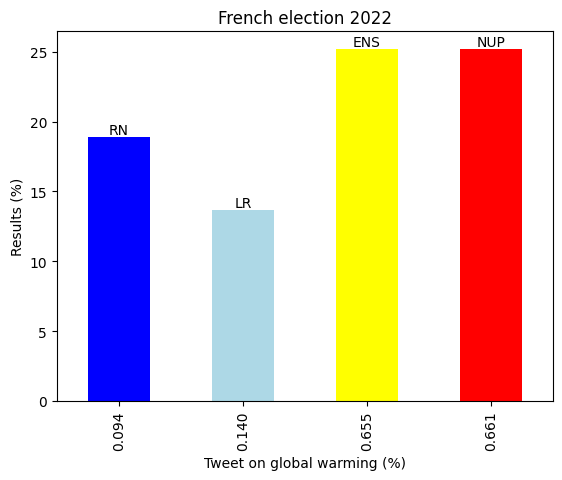

In [23]:
ax = Dati.plot.bar(x = 'Tweet_p' , y = 'Risultati'  , color= Dati['Colori'].array , legend = False , 
xlabel = 'Tweet on global warming (%)' , ylabel = 'Results (%)' , title = "French election 2022")

counter = 0
for patch in ax.patches :
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0] 
    y = patch.get_height() + bl[1] +0.2
    ax.text(x,y,(Dati.Partiti[counter]),
            ha='center', rotation='horizontal')
    counter = counter +1

In [21]:
Dati.to_csv('Elezioni2022.csv' , index=False)